In [2]:
import gzip
import json
import pandas as pd
from datetime import datetime

In [3]:
lines = []
for line in gzip.open('data/weather.json.gz', 'r'):
    lines.append(json.loads(line))

In [4]:
data = pd.json_normalize(lines)

In [5]:
data['time'] = pd.to_datetime(data['time'], unit='s')
data[['main.temp', 'main.temp_min', 'main.temp_max']] = data[['main.temp', 'main.temp_min', 'main.temp_max']] - 273.15
data['main.temp_amplitude'] = data['main.temp_max'] - data['main.temp_min']

In [11]:
import matplotlib.pyplot as plt

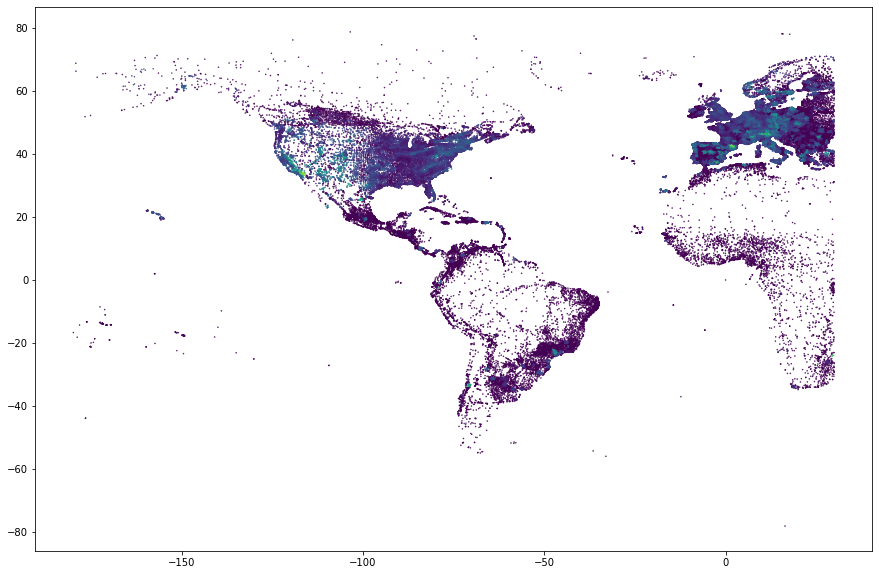

In [34]:
data_europe = data[data['city.coord.lon'] < 30]
fig = plt.figure(figsize=(15, 10))
plt.scatter(data = data_europe, x='city.coord.lon', y='city.coord.lat', s=0.25, c='main.temp_amplitude')